## 简介

### NaN简介

In [1]:
# 查看NaN，NAN，nan
from numpy import NaN,NAN,nan
print(NaN==True)
print(NaN==False)
print(NaN==0)
print(NaN=='')


False
False
False
False


In [2]:
# 两个NaN也不相等
print(NaN==NaN)
print(NaN==nan)
print(NaN==NAN)
print(nan==NAN)


False
False
False
False


In [3]:
# Pandas提供了isnull/isna方法，用于测试某个值是否为缺失值
import pandas as pd
print(pd.isnull(NaN))
print(pd.isnull(nan))
print(pd.isnull(NAN))



True
True
True


In [4]:
# Pandas的notnull/notna方法也可以用于判断某个值是否为缺失值
print(pd.notnull(NaN))
print(pd.notnull(42))

False
True


## 加载缺失值

### 加载数据时可以通过keep_default_na 与 na_values 指定加载数据时的缺失值

In [6]:

pd.read_csv('data/survey_visited.csv')


,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


### 加载数据，不包含默认缺失值

In [7]:

pd.read_csv('data/survey_visited.csv',keep_default_na = False)


,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


### 加载数据，手动指定缺失值

In [9]:

pd.read_csv('data/survey_visited.csv',na_values=[""],keep_default_na = False)


,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22



## 处理缺失值

### 加载数据

In [11]:
train=pd.read_csv('data/titanic_train.csv')
test=pd.read_csv('data/titanic_test.csv')
train.shape


(891, 12)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 查看数据

In [13]:
# 查看是否获救数据
train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [15]:
# 检测数据集中每一列中缺失值的百分比
# 定义missing_values_table，计算每列缺失百分比
def missing_values_table(df):
    # 计算所有的缺失值
    mis_val = df.isnull().sum()

    # 计算缺失值比例
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # 将结果拼接成dataframe
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # 将列重命名
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : '缺失值', 1 : '占比（%）'})

    # 按照缺失值降序排列，并把缺失值为0的数据排除
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '占比（%）', ascending=False).round(1)

    # 打印信息
    print ("传入的数据集中共 " + str(df.shape[1]) + " 列.\n"      
        "其中 " + str(mis_val_table_ren_columns.shape[0]) +
          "列包含缺失值")

    # 返回缺失值信息的dataframe
    return mis_val_table_ren_columns

In [16]:
# 训练集缺失情况
train_missing= missing_values_table(train)
train_missing


传入的数据集中共 12 列.
其中 3列包含缺失值


,缺失值,占比（%）
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [17]:
# 测试集缺失情况
test_missing= missing_values_table(test)
test_missing


传入的数据集中共 11 列.
其中 3列包含缺失值


,缺失值,占比（%）
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


### 缺失值可视化

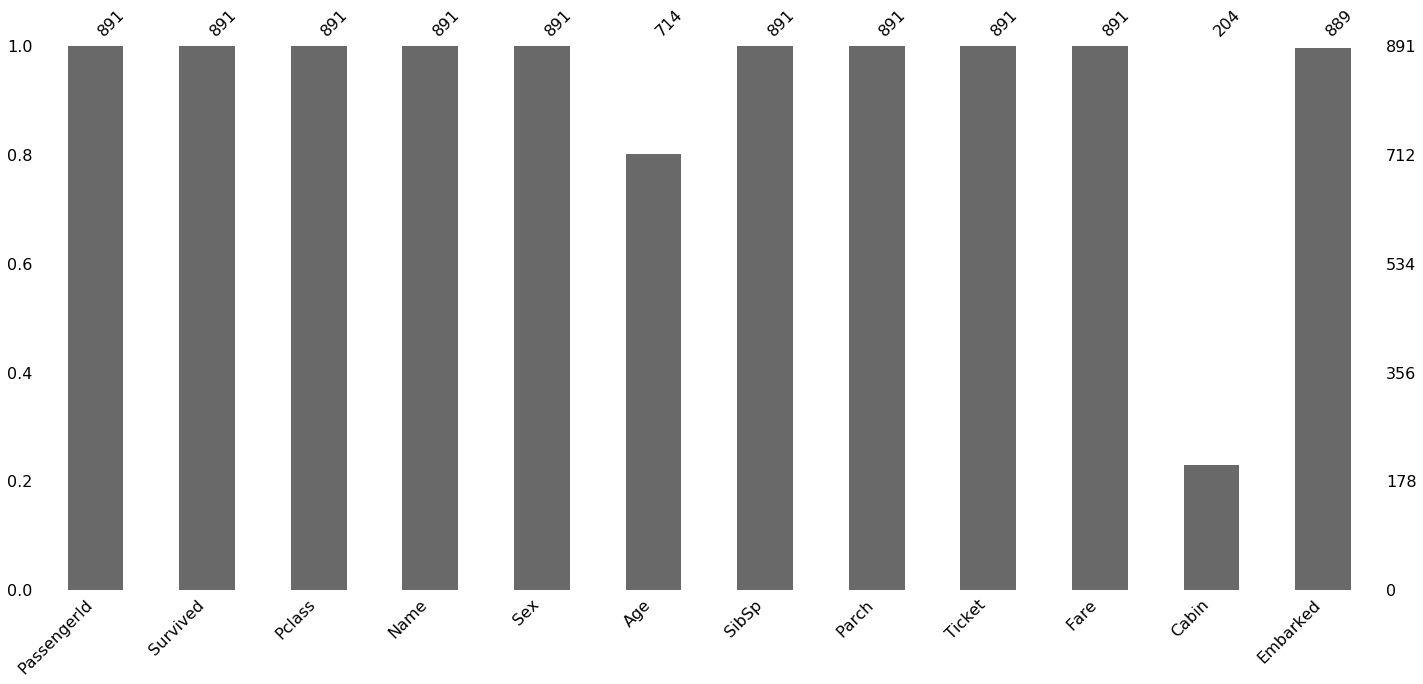

In [19]:
# 条形图
# 条形图提供了数据集完整性的可视化图形。 
# 我们可以看到“年龄”，“客舱号码”和“登船的港口”列包含值缺失
import missingno as msno
msno.bar(train)


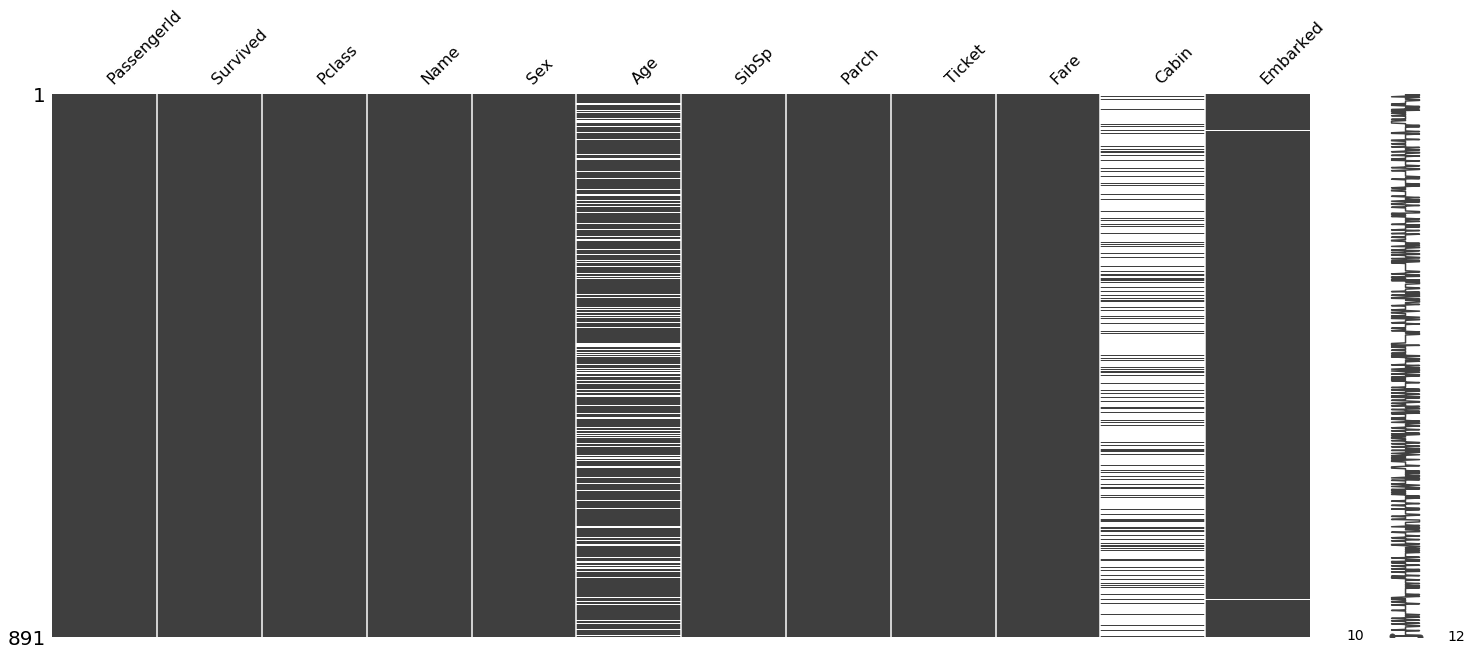

In [20]:
# msno.matrix 函数
# 快速直观的查看缺失值的分布情况

# 在有缺失值的地方，图都显示为空白。 例如，在“ Embarked”列中，只有两个丢失数据的实例，因此有两个白线。
# 右侧的迷你图给出了数据完整性的情况，并在底部指出了最少有10列数据是完整的，最多有12列数据是完整的

msno.matrix(train)



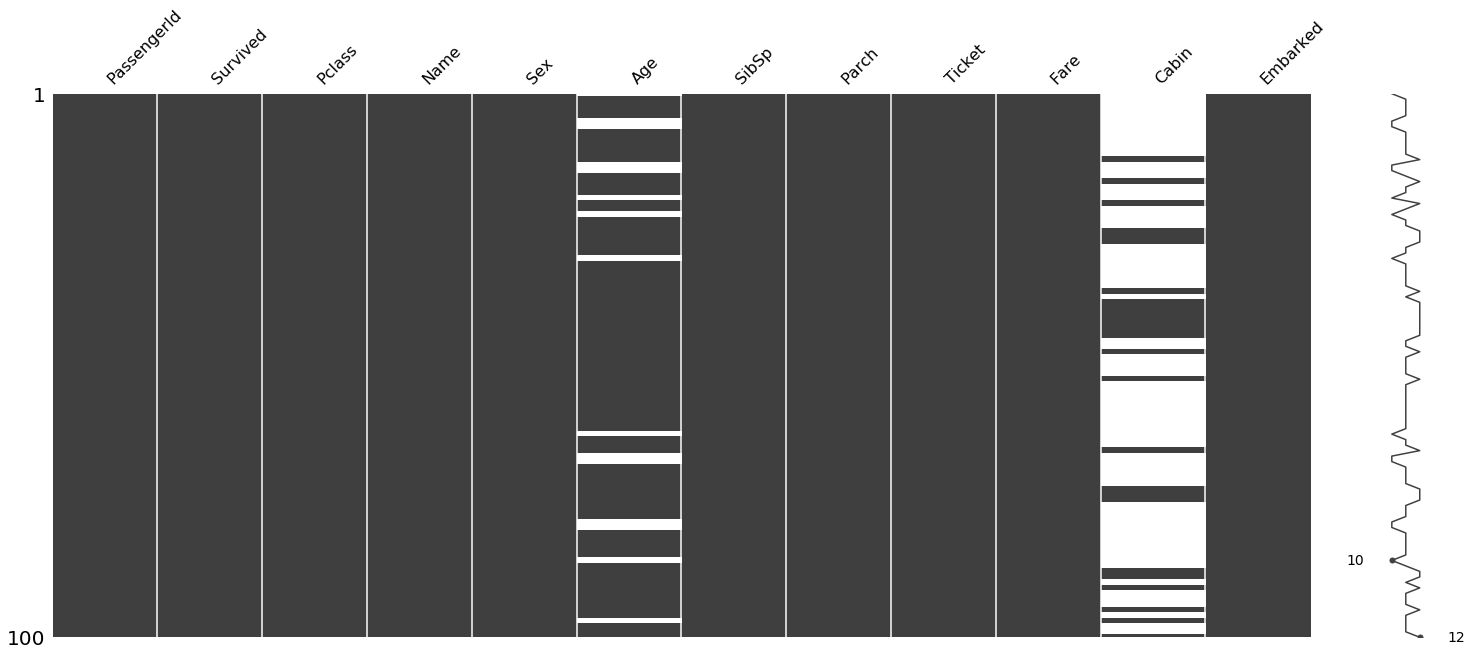

In [21]:
# 取出一小部分数据进一步查看
msno.matrix(train.sample(100))


### 查看缺失值之间相关性

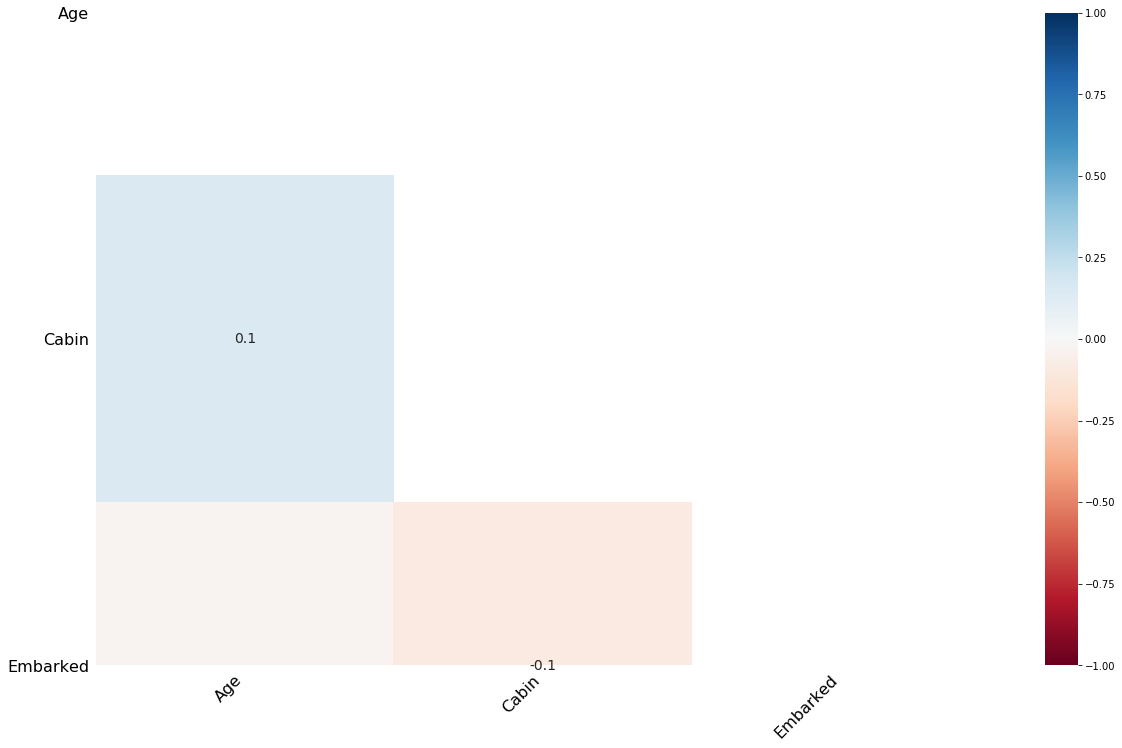

In [22]:
# 通过计算缺失值间相关性判断缺失原因
# 通过上图发现，age 和 cabin的相关性为0.1，
#（相关性取值 0 不相关，1强相关，-1强负相关），
# 所以相关性不强，也就是说，age是否缺失，与Cabin是否缺失没多大关系

msno.heatmap(train)


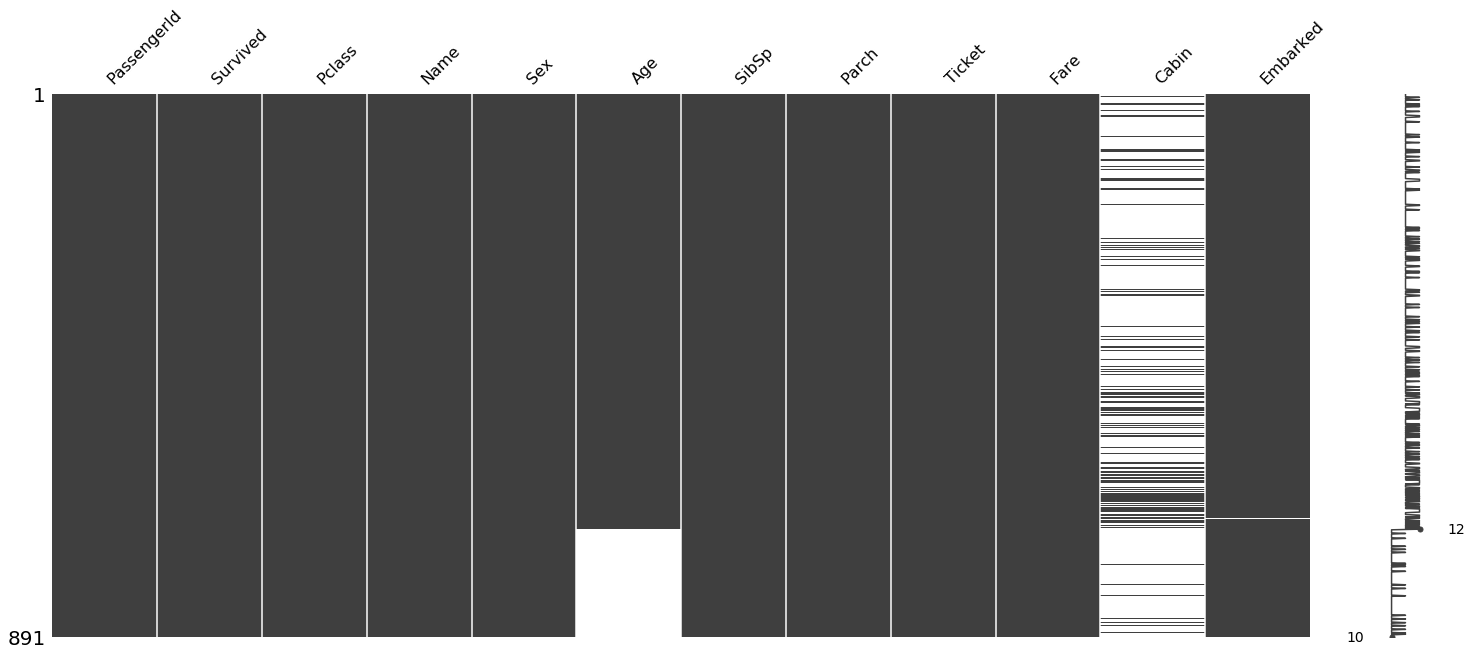

In [23]:
# 进一步将age进行排序，验证了age的缺失 与cabin确实无关
sorted = train.sort_values('Age')
msno.matrix(sorted)

### 缺失值处理

In [24]:
#按行删除：删除包含缺失值的记录
train_1 = train.copy() # 复制一份数据
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()



0

In [25]:
train_1.shape

(714, 12)

In [26]:
# 按列删除
# 当一列包含了很多缺失值的时候（比如超过80%），可以将该列删除，但最好不要删除数据
train_1.drop(['Age'],axis = 1).head()


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


### 填充缺失值

#### 非时间序列数据

In [28]:
# 使用常量来替换（默认值）
train_constant = train.copy()
train_constant.fillna(0,inplace = True)
train_constant.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:

train_constant[train_constant['Cabin']==0].shape

(687, 12)

In [30]:
# 使用统计量替换（缺失值所处列的平均值、中位数、众数）
train_mean = train.copy()
train_mean['Age'].fillna(train_mean['Age'].mean(),inplace = True)
train_mean.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 时间序列数据

In [32]:
# 加载时间序列数据，数据集为印度城市空气质量数据（2015-2020）
city_day = pd.read_csv('data/city_day.csv',parse_dates=True,index_col='Date')
city_day1=city_day.copy()
city_day.head()


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [33]:
# 用之前封装的方法，查看数据缺失情况
city_day_missing= missing_values_table(city_day)
city_day_missing


传入的数据集中共 15 列.
其中 14列包含缺失值


,缺失值,占比（%）
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [34]:
# 查看包含缺失数据的部分
city_day['Xylene'][50:64]


Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [35]:
# 使用ffill 填充，用时间序列中空值的上一个非空值填充
# NaN值的前一个非空值是0.81，可以看到所有的NaN都被填充为0.81
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]


Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

In [36]:
# 使用bfill填充，用时间序列中空值的下一个非空值填充
# NaN值的后一个非空值是209，可以看到所有的NaN都被填充为209
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]


Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [37]:
# 线性插值方法填充缺失值
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]


Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64